In [ ]:
# Generates augmented images

In [1]:
import albumentations as A
from PIL import Image
import numpy as np
import os
import glob
import matplotlib.pyplot as plt   
import cv2
IMG_SIZE = 224

In [2]:
main_path = "./chest_xray_data/"


train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")
val_path=os.path.join(main_path,"val")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

val_normal = glob.glob(val_path+"/NORMAL/*.jpeg")
val_pneumonia = glob.glob(val_path+"/PNEUMONIA/*.jpeg")

In [4]:


# Create a pipeline with 4 different transformations. 
transform = A.Compose(
    [
#        A.RandomCrop(width=256, height=256),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(brightness_limit=.5, contrast_limit=.3),
        A.Rotate(),
    ]
)

#

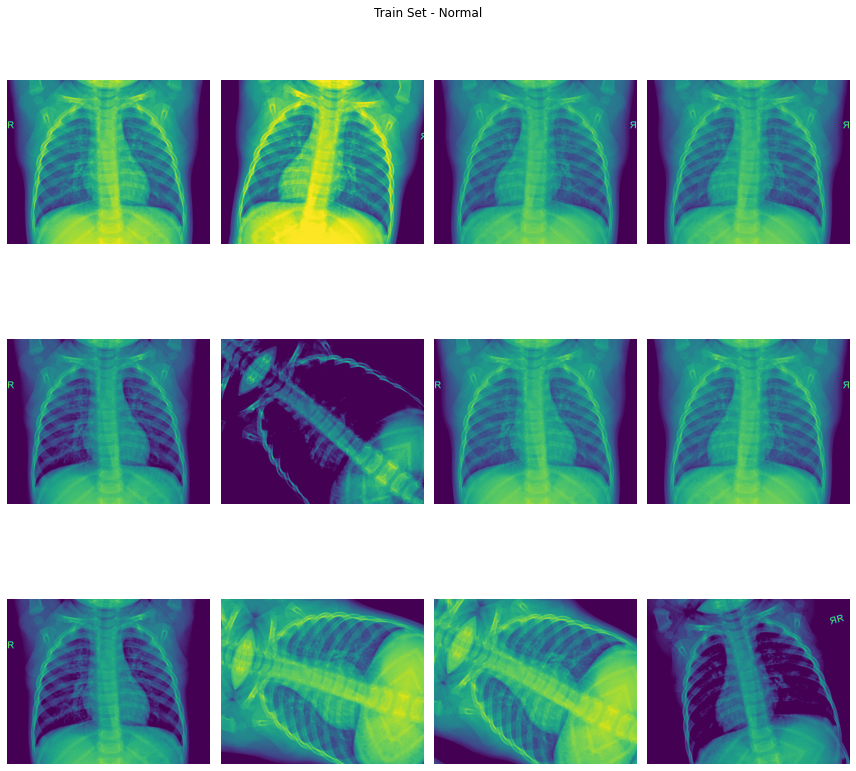

In [5]:


plt.figure(figsize=(12,12))
pillow_image = Image.open('./chest_xray_data/train/NORMAL/IM-0713-0001.jpeg')
image = np.array(pillow_image)

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    transformed = transform(image=image)
    transformed_image = transformed["image"]
    img = cv2.resize(transformed_image, (IMG_SIZE,IMG_SIZE))
    img = Image.fromarray(transformed_image)
    
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.suptitle('Train Set - Normal')

plt.show()